In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data

In [ ]:
#reading the citation data
#since the data is too big, I separate it to chunks

chunk_size = 10**6
i = 0

# Iterate over the file in chunks
for chunk in pd.read_csv('Data/g_us_patent_citation.tsv', sep="\t",chunksize=chunk_size):
    chunk.to_csv(f'chunk_{i}.csv', index=False)
    i += 1
    # Break out of the loop if the chunk is empty
    if len(chunk) == 0:
        break

In [32]:
# reading the assignee data. Then I will randomly choose 10000 assignees with their patents.
# Then I'll take these patents from the citation data.
# I do this because the citation data is gigantic (it has about 129 million rows), so I cannot process it.
assig = pd.read_csv("Data/g_assignee_disambiguated.tsv", sep="\t")
len(set(assig["assignee_id"])) # unique number of assignees

433650

In [ ]:
# Let us first choose random 10000 assignees.
random_10000 = pd.DataFrame(assig["assignee_id"].unique()).sample(n=10000,random_state=41)

# Let us take the patents that belong to these 10000 random assignees
random_10000_assignees = assig[assig['assignee_id'].isin(random_10000[0])]
random_10000_assignees.to_csv("random_10000_assig.csv")

In [ ]:
# Now, let us take these patents from citation data. We are taking patents that are cited.
patent_ids = random_10000_assignees["patent_id"]
for i in range(0,127):
    ch = pd.read_csv(f"chunk_{i}.csv")
    selected_rows = ch[ch['citation_patent_id'].isin(patent_ids)]
    selected_rows.to_csv(f"chunk_{i}_b.csv")

In [2]:
#until this part, you don't have to use the codes because all of them created and added to the Github.

# concatenate these small citation random data samples
filenames = []
for i in range(0,127):
    filenames.append(f"chunk_{i}_b.csv")

# Load the .csv files into a list of DataFrames
df_list = [pd.read_csv(f) for f in filenames]

# Concatenate the DataFrames into a single DataFrame
cite = pd.concat(df_list)
cite["patent_id"] = cite["patent_id"].astype(str)
cite = cite.drop(columns=["Unnamed: 0"])

In [5]:
# patent_id == citing patent
# citation_patent_id == cited patent
# citation_date == first day of the month the cited patent (citation_id) was granted
# record_name == name of cited record
cite.head()

,patent_id,citation_sequence,citation_patent_id,citation_date,record_name,wipo_kind,citation_category
0,5718485,9,5575539,1996-11-01,Stach,NaN,NaN
1,6906497,106,6580258,2003-06-01,Wilcox et al.,B2,cited by other
2,9608583,61,5008814,1991-04-01,Mathur,A,cited by applicant
3,8758092,16,6322431,2001-11-01,Schaenzer et al.,B1,cited by applicant
4,8372210,8,5379474,1995-01-01,Nakamura,A,cited by applicant


In [3]:
# Note that citation_date is not the date when the citation is made. 
# I will use the application year (filing year) of the citing patent to understand when the citation was made. 

#reading the application data
#application = pd.read_csv("Data/g_application.tsv",sep="\t")

#cite_with_date = pd.merge(cite, application, how="inner", on="patent_id")
#cite_with_date.head()

/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_48631/3003475976.py:5: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  application = pd.read_csv("Data/g_application.tsv",sep="\t")


,patent_id,citation_sequence,citation_patent_id,citation_date,record_name,wipo_kind,citation_category,application_id,patent_application_type,filing_date,series_code,rule_47_flag
0,6906497,106,6580258,2003-06-01,Wilcox et al.,B2,cited by other,2003/10738058,10,2003-12-17,10,0.0
1,6906497,99,6127815,2000-10-01,Wilcox,A,cited by other,2003/10738058,10,2003-12-17,10,0.0
2,6906497,64,5723970,1998-03-01,Bell,A,cited by other,2003/10738058,10,2003-12-17,10,0.0
3,9608583,61,5008814,1991-04-01,Mathur,A,cited by applicant,2014/14511267,14,2014-10-10,14,0.0
4,9608583,86,5192999,1993-03-01,Graczyk,A,cited by applicant,2014/14511267,14,2014-10-10,14,0.0


In [6]:
#cite_with_date["patent_id"] = cite_with_date["patent_id"].astype(str)
#cite_with_date["citation_patent_id"] = cite_with_date["citation_patent_id"].astype(str)

#cite_with_date["AppYear"] = cite_with_date["filing_date"].str[:4]
#cite_with_date = cite_with_date.drop(columns=["series_code","rule_47_flag"])
#cite_with_date

In [ ]:
# Calculating yearly citations received for each patent

#yearly_cite = cite_with_date.groupby(['AppYear', 'citation_patent_id']).size().reset_index(name='count')
#yearly_cite["AppYear"] = yearly_cite["AppYear"].astype(int)
#yearly_cite = yearly_cite[yearly_cite["AppYear"] >= 1975]
#yearly_cite = yearly_cite[yearly_cite["AppYear"] <= 2022]
#yearly_cite.to_csv("year_patent_citation.csv")

In [5]:
#yearly_cite = pd.read_csv("year_patent_citation.csv")
#yearly_cite.rename(columns={"AppYear":"year","citation_patent_id":"patent_id"},inplace=True)

In [6]:
# Note that in the yearly_cite dataset, only the years where a patent has citation exist.
# For example the patent 3930292 only received citations in 1975, 1978, 1990, 1996, and 2001.
# In the data "yearly_cite" there are no rows for the years when this patent received no citation.
# Here, I will add all years to the data.

#years = range(1975,2023)
#year_df = pd.DataFrame({'year': years})
#patent_ids = yearly_cite['patent_id'].unique()
#patent_ids_df = pd.DataFrame({'patent_id': patent_ids})
#create a common column in each dataframes.
#year_df['key'] = 1
#patent_ids_df['key'] = 1

#all_years_patent_ids = pd.merge(year_df, patent_ids_df, on='key', how='outer')
#yearly_cite = yearly_cite.merge(all_years_patent_ids, on=['year', 'patent_id'], how='outer')
#yearly_cite.fillna(0,inplace=True)
#yearly_cite.sort_values('year',inplace=True)

In [19]:
#total citations of patents
total_cite = cite.groupby(["citation_patent_id"])["patent_id"].count().reset_index()
total_cite.rename(columns={"patent_id":"count","citation_patent_id":"patent_id"},inplace=True)

In [20]:
total_cite

,patent_id,count
0,10000017,1
1,10000033,3
2,10000097,2
3,10000383,1
4,10000524,3
...,...,...
86487,T984004,1
86488,T985006,4
86489,T986006,2
86490,T998002,3


In [21]:
total_cite.to_csv("total_cite.csv")

## Creating the Features

In [ ]:
# Let us divide the data that contains information about patents into chunks
chunk_size = 10**6
i = 0

# Iterate over the file in chunks
for chunk in pd.read_csv('Data/g_patent.tsv', sep="\t",chunksize=chunk_size):
    chunk.to_csv(f'patent_chunk_{i}.csv', index=False)
    i += 1
    # Break out of the loop if the chunk is empty
    if len(chunk) == 0:
        break

In [ ]:
# taking patents in the total citation data from the patent data
patent_ids = yearly_cite["citation_patent_id"]
for i in range(0,9):
    patent_ch = pd.read_csv(f"patent_chunk_{i}.csv")
    patent_ch["patent_id"] = patent_ch["patent_id"].astype(str)
    selected_rows = patent_ch[patent_ch['patent_id'].isin(patent_ids)]
    selected_rows.to_csv(f"patent_chunk_{i}_b.csv")

In [22]:
# concatenate these patent chunks
filenames = []
for i in range(0,9):
    filenames.append(f"patent_chunk_{i}_b.csv")

df_list = [pd.read_csv(f) for f in filenames]
patents = pd.concat(df_list)

In [23]:
del df_list # release some memory

In [24]:
cite

,patent_id,citation_sequence,citation_patent_id,citation_date,record_name,wipo_kind,citation_category
0,5718485,9,5575539,1996-11-01,Stach,NaN,NaN
1,6906497,106,6580258,2003-06-01,Wilcox et al.,B2,cited by other
2,9608583,61,5008814,1991-04-01,Mathur,A,cited by applicant
3,8758092,16,6322431,2001-11-01,Schaenzer et al.,B1,cited by applicant
4,8372210,8,5379474,1995-01-01,Nakamura,A,cited by applicant
...,...,...,...,...,...,...,...
7583,7588185,7,4063229,1977-12-01,Welsh et al.,A,cited by other
7584,8607791,210,7565905,2009-07-01,Hickle,B2,cited by applicant
7585,D858516,73,D761140,2016-07-01,"Wimmer, IV",S,cited by applicant
7586,9128083,1,6730740,2004-05-01,Mestach et al.,B1,cited by examiner


In [25]:
patents["patent_id"] = patents["patent_id"].astype(str)

#merge the patent data and yearly citations data
total_cite_patentinfo = pd.merge(total_cite, patents, how="inner", on="patent_id")
total_cite_patentinfo

,patent_id,count,Unnamed: 0,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename
0,10000017,1,15,utility,2018-06-19,Method for mounting a vortex generator and mou...,The invention relates to a method for securing...,B2,21,0,ipg180619.xml
1,10000033,3,31,utility,2018-06-19,"Washable, waterproof, sealable and reusable st...",Disclosed are embodiments of a versatile stora...,B2,20,0,ipg180619.xml
2,10000097,2,94,utility,2018-06-19,Electrostatic energy generator using tire cord...,An electrostatic energy generator may include ...,B2,15,0,ipg180619.xml
3,10000383,1,379,utility,2018-06-19,CO2 recovery apparatus and CO2 recovery method,A CO2 recovery apparatus capable of recovering...,B2,7,0,ipg180619.xml
4,10000524,3,516,utility,2018-06-19,Synthesis of estetrol via estrone derived ster...,A process is provided for the making of estetr...,B2,17,0,ipg180619.xml
...,...,...,...,...,...,...,...,...,...,...,...
86432,T984004,1,169688,defensive publication,1979-07-03,Grader blade actuator,NaN,I4,7,0,pftaps19790703_wk27.zip
86433,T985006,4,169697,defensive publication,1979-08-07,Retaining means for pivot pin,NaN,I4,1,0,pftaps19790807_wk32.zip
86434,T986006,2,169703,defensive publication,1979-09-04,Air circulation system/cab,NaN,I4,1,0,pftaps19790904_wk36.zip
86435,T998002,3,169761,defensive publication,1980-09-02,Governor dual power setting selection control,NaN,I4,1,0,pftaps19800902_wk36.zip


In [26]:
del patents

In [27]:
#adding application year to the yearly_cite_patentinfo
application = pd.read_csv("Data/g_application.tsv",sep="\t")
application_n = application[["patent_id","filing_date"]]
application_n["filing_date"] = application_n["filing_date"].str[:4]
total_cite_patentinfo_app_year = pd.merge(total_cite_patentinfo,application_n,on="patent_id")

/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_49876/1932790891.py:2: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  application = pd.read_csv("Data/g_application.tsv",sep="\t")
/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_49876/1932790891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_n["filing_date"] = application_n["filing_date"].str[:4]


In [28]:
total_cite_patentinfo_app_year

,patent_id,count,Unnamed: 0,patent_type,patent_date,patent_title,patent_abstract,wipo_kind,num_claims,withdrawn,filename,filing_date
0,10000017,1,15,utility,2018-06-19,Method for mounting a vortex generator and mou...,The invention relates to a method for securing...,B2,21,0,ipg180619.xml,2015
1,10000033,3,31,utility,2018-06-19,"Washable, waterproof, sealable and reusable st...",Disclosed are embodiments of a versatile stora...,B2,20,0,ipg180619.xml,2015
2,10000097,2,94,utility,2018-06-19,Electrostatic energy generator using tire cord...,An electrostatic energy generator may include ...,B2,15,0,ipg180619.xml,2015
3,10000383,1,379,utility,2018-06-19,CO2 recovery apparatus and CO2 recovery method,A CO2 recovery apparatus capable of recovering...,B2,7,0,ipg180619.xml,2014
4,10000524,3,516,utility,2018-06-19,Synthesis of estetrol via estrone derived ster...,A process is provided for the making of estetr...,B2,17,0,ipg180619.xml,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
84286,T984004,1,169688,defensive publication,1979-07-03,Grader blade actuator,NaN,I4,7,0,pftaps19790703_wk27.zip,1978
84287,T985006,4,169697,defensive publication,1979-08-07,Retaining means for pivot pin,NaN,I4,1,0,pftaps19790807_wk32.zip,1978
84288,T986006,2,169703,defensive publication,1979-09-04,Air circulation system/cab,NaN,I4,1,0,pftaps19790904_wk36.zip,1978
84289,T998002,3,169761,defensive publication,1980-09-02,Governor dual power setting selection control,NaN,I4,1,0,pftaps19800902_wk36.zip,1979


In [30]:
#Cosmetic regulations
total_cite_patentinfo_app_year = total_cite_patentinfo_app_year.drop(columns=["Unnamed: 0","patent_title","patent_abstract","withdrawn","filename","wipo_kind"])
total_cite_patentinfo_app_year.rename(columns = {"patent_date":"grant_year", "filing_date":"application_year"}, inplace=True)
total_cite_patentinfo_app_year.head()

,patent_id,count,patent_type,grant_year,num_claims,application_year
0,10000017,1,utility,2018-06-19,21,2015
1,10000033,3,utility,2018-06-19,20,2015
2,10000097,2,utility,2018-06-19,15,2015
3,10000383,1,utility,2018-06-19,7,2014
4,10000524,3,utility,2018-06-19,17,2014


In [31]:
del application

In [40]:
#taking assignee information
assig = assig[["patent_id","assignee_id", "disambig_assignee_organization","assignee_type","location_id"]]
assig["patent_id"] = assig["patent_id"].astype(str)

total_cite_patentinfo_app_year_assig = pd.merge(total_cite_patentinfo_app_year,assig,on="patent_id", how='inner')

In [44]:
total_cite_patentinfo_app_year_assig.head()

,patent_id,count,patent_type,grant_year,num_claims,application_year,assignee_id,disambig_assignee_organization,assignee_type,location_id
0,10000017,1,utility,2018-06-19,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,Senvion SE,3.0,20e76e60-16c8-11ed-9b5f-1234bde3cd05
1,10000033,3,utility,2018-06-19,20,2015,059ac554-6b33-412e-8132-e06f8d247853,Blueavacado. Co.,2.0,1811f8b9-16c8-11ed-9b5f-1234bde3cd05
2,10000097,2,utility,2018-06-19,15,2015,b4a6ac7e-104d-4ca2-bec4-d050e9c41700,Research & Business Foundation Sungkyunkwan Un...,3.0,3eea8bf8-16c8-11ed-9b5f-1234bde3cd05
3,10000383,1,utility,2018-06-19,7,2014,9b8a68e0-9a3a-4915-8c96-ae75be37e22f,"The Kansai Electric Power Co., Inc.",3.0,4d021adf-2f00-11ed-aea8-1234bde3cd05
4,10000524,3,utility,2018-06-19,17,2014,12c72c3e-b194-410a-90c7-dc03491fc73c,Donesta Bioscience B.V.,3.0,7c46904c-16c8-11ed-9b5f-1234bde3cd05


In [42]:
# check non-unique patent-ids
non_unique_mask = total_cite_patentinfo_app_year_assig.duplicated(subset='patent_id')
non_unique_values = total_cite_patentinfo_app_year_assig[non_unique_mask]

In [43]:
non_unique_values

,patent_id,count,patent_type,grant_year,num_claims,application_year,assignee_id,disambig_assignee_organization,assignee_type,location_id
7,10000614,1,utility,2018-06-19,5,2012,76f8c026-e1ec-4fbf-b3ab-84842c138090,AALTO UNIVERSITY FOUNDATION,3.0,402cc2a9-16c8-11ed-9b5f-1234bde3cd05
10,10001700,1,utility,2018-06-19,7,2014,b4a6ac7e-104d-4ca2-bec4-d050e9c41700,Research & Business Foundation Sungkyunkwan Un...,3.0,75436e0d-16c8-11ed-9b5f-1234bde3cd05
11,10001700,1,utility,2018-06-19,7,2014,5494af86-7878-4688-af84-088d746fc958,FINE SEMITECH CORP.,3.0,75436e0d-16c8-11ed-9b5f-1234bde3cd05
25,10003106,2,utility,2018-06-19,15,2015,09194b4f-7872-42d8-8b16-79270885ad55,"Samsung Electronics Co., Ltd.",3.0,3eea8bf8-16c8-11ed-9b5f-1234bde3cd05
36,10004462,3,utility,2018-06-26,28,2015,f3211354-b7c8-4ceb-8045-7c1bf7505f62,"Kineticor, Inc.",2.0,224dae5d-16c8-11ed-9b5f-1234bde3cd05
...,...,...,...,...,...,...,...,...,...,...
89377,D925855,1,design,2021-07-20,1,2019,8e2f144f-c30b-4737-a614-d0846506d21f,NaN,5.0,1aeb3c64-16c8-11ed-9b5f-1234bde3cd05
89433,D932186,1,design,2021-10-05,1,2019,7b4dab17-f263-45dd-8435-f4e4f7421b2a,Keter Plastic Ltd.,3.0,5094ecaa-16c8-11ed-9b5f-1234bde3cd05
89488,D941020,1,design,2022-01-18,1,2019,859bcb9c-451d-4bb2-a393-50f796f73b50,Milwaukee Electric Tool Corporation,2.0,e8c44888-16c7-11ed-9b5f-1234bde3cd05
89516,PP4132,14,plant,1977-10-25,1,1977,1f253574-65a3-4689-930a-7d145c847ac2,NaN,5.0,c1ef821a-16c7-11ed-9b5f-1234bde3cd05


In [46]:
# it seems that some patents have multiple assignees, so let us drop duplicates and take one assignee for each patent for the sake of the analysis.
assig[assig["patent_id"]=="10000614"]

,patent_id,assignee_id,disambig_assignee_organization,assignee_type,location_id
3063341,10000614,b5229f89-eb74-4568-867e-fc6ebbdbed06,TEKNOLOGIAN TUTKIMUSKESKUS VTT,3.0,402cc2a9-16c8-11ed-9b5f-1234bde3cd05
5415458,10000614,76f8c026-e1ec-4fbf-b3ab-84842c138090,AALTO UNIVERSITY FOUNDATION,3.0,402cc2a9-16c8-11ed-9b5f-1234bde3cd05


In [47]:
# drop duplicates
total_cite_patentinfo_app_year_assig = total_cite_patentinfo_app_year_assig.drop_duplicates(subset='patent_id')

In [49]:
total_cite_patentinfo_app_year_assig.to_csv("totalcite_patentinfo_appyear_assig.csv")

In [2]:
#yearly_cite_patentinfo_app_year_assig = pd.read_csv("yearlycite_patentinfo_appyear_assig.csv")

/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_49496/1161671854.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  yearly_cite_patentinfo_app_year_assig = pd.read_csv("yearlycite_patentinfo_appyear_assig.csv")


In [50]:
del assig

In [ ]:
# Reading the patent class data
chunk_size = 10**6
i = 0

# Iterate over the file in chunks
for chunk in pd.read_csv('Data/g_ipc_at_issue.tsv', sep="\t",chunksize=chunk_size):
    chunk.to_csv(f'class_chunk_{i}.csv', index=False)
    i += 1
    # Break out of the loop if the chunk is empty
    if len(chunk) == 0:
        break

patent_ids = set(yearly_cite_patentinfo_app_year_assig["patent_id"])
for i in range(0,21):
    class_ch = pd.read_csv(f"class_chunk_{i}.csv")
    class_ch["patent_id"] = class_ch["patent_id"].astype(str)
    selected_rows = class_ch[class_ch['patent_id'].isin(patent_ids)]
    selected_rows.to_csv(f"class_chunk_{i}_b.csv")

In [51]:
# concatenate these chunks
filenames = []
for i in range(0,21):
    filenames.append(f"class_chunk_{i}_b.csv")

df_list = [pd.read_csv(f) for f in filenames]
classes = pd.concat(df_list)

In [54]:
#Calculating patent family size
pt_class = pd.read_csv('Data/g_ipc_at_issue.tsv', sep="\t")
pt_class = pt_class.drop_duplicates(subset='patent_id')
pt_class["patent_id"] = pt_class["patent_id"].astype(str)
pt_class["ipc_class"] = pt_class["ipc_class"].astype(str)
grouped = pt_class.groupby('ipc_class')
result_class = grouped.size()
result_class = pd.DataFrame(result_class)
result_class.rename(columns={0:"size"}, inplace=True)
result_class['size'] = result_class['size'].apply(np.log)
del pt_class

/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_49876/1457137619.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  pt_class = pd.read_csv('Data/g_ipc_at_issue.tsv', sep="\t")


In [62]:
total_cite_patentinfo_app_year_assig

,patent_id,count,patent_type,grant_year,num_claims,application_year,assignee_id,disambig_assignee_organization,assignee_type,location_id
0,10000017,1,utility,2018-06-19,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,Senvion SE,3.0,20e76e60-16c8-11ed-9b5f-1234bde3cd05
1,10000033,3,utility,2018-06-19,20,2015,059ac554-6b33-412e-8132-e06f8d247853,Blueavacado. Co.,2.0,1811f8b9-16c8-11ed-9b5f-1234bde3cd05
2,10000097,2,utility,2018-06-19,15,2015,b4a6ac7e-104d-4ca2-bec4-d050e9c41700,Research & Business Foundation Sungkyunkwan Un...,3.0,3eea8bf8-16c8-11ed-9b5f-1234bde3cd05
3,10000383,1,utility,2018-06-19,7,2014,9b8a68e0-9a3a-4915-8c96-ae75be37e22f,"The Kansai Electric Power Co., Inc.",3.0,4d021adf-2f00-11ed-aea8-1234bde3cd05
4,10000524,3,utility,2018-06-19,17,2014,12c72c3e-b194-410a-90c7-dc03491fc73c,Donesta Bioscience B.V.,3.0,7c46904c-16c8-11ed-9b5f-1234bde3cd05
...,...,...,...,...,...,...,...,...,...,...
89785,T984004,1,defensive publication,1979-07-03,7,1978,88227f79-893e-47d1-b57d-745aad4c00af,Caterpillar Tractor Co.,2.0,e972d299-16c7-11ed-9b5f-1234bde3cd05
89786,T985006,4,defensive publication,1979-08-07,1,1978,88227f79-893e-47d1-b57d-745aad4c00af,Caterpillar Tractor Co.,2.0,e972d299-16c7-11ed-9b5f-1234bde3cd05
89787,T986006,2,defensive publication,1979-09-04,1,1978,88227f79-893e-47d1-b57d-745aad4c00af,Caterpillar Tractor Co.,2.0,e972d299-16c7-11ed-9b5f-1234bde3cd05
89788,T998002,3,defensive publication,1980-09-02,1,1979,88227f79-893e-47d1-b57d-745aad4c00af,Caterpillar Tractor Co.,2.0,e972d299-16c7-11ed-9b5f-1234bde3cd05


In [74]:
#Merging
classes["ipc_class"] = classes["ipc_class"].astype(str)
total_cite_patentinfo_app_year_assig_class = pd.merge(total_cite_patentinfo_app_year_assig, classes,on="patent_id",how='inner')
total_cite_patentinfo_app_year_assig_class = pd.merge(total_cite_patentinfo_app_year_assig_class,result_class,on = "ipc_class")
total_cite_patentinfo_app_year_assig_class["grant_year"] = total_cite_patentinfo_app_year_assig_class["grant_year"].str[:4]

In [78]:
total_cite_patentinfo_app_year_assig_class

,patent_id,count,patent_type,grant_year,num_claims,application_year,assignee_id,disambig_assignee_organization,assignee_type,location_id,...,subclass,main_group,subgroup,symbol_position,classification_value,classification_status,classification_data_source,action_date,ipc_version_indicator,size
0,10000017,1,utility,2018,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,Senvion SE,3.0,20e76e60-16c8-11ed-9b5f-1234bde3cd05,...,C,65,50,L,I,B,H,2018-06-19,2006-01-01,11.079678
1,10000017,1,utility,2018,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,Senvion SE,3.0,20e76e60-16c8-11ed-9b5f-1234bde3cd05,...,C,65,78,L,I,B,H,2018-06-19,2006-01-01,11.079678
2,10000017,1,utility,2018,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,Senvion SE,3.0,20e76e60-16c8-11ed-9b5f-1234bde3cd05,...,C,65,54,F,I,B,H,2018-06-19,2006-01-01,11.079678
3,10000017,1,utility,2018,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,Senvion SE,3.0,20e76e60-16c8-11ed-9b5f-1234bde3cd05,...,C,65,48,L,I,B,H,2018-06-19,2006-01-01,11.079678
4,10000017,1,utility,2018,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,Senvion SE,3.0,20e76e60-16c8-11ed-9b5f-1234bde3cd05,...,C,65,0,L,I,B,H,2018-06-19,2006-01-01,11.079678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158778,D451959,5,design,2001,1,2001,808ff537-991e-4d24-ba0a-5efdce8ab38d,"Xyron, Inc.",2.0,c42a7d8e-16c7-11ed-9b5f-1234bde3cd05,...,02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.890583
158779,D464189,8,design,2002,1,2001,7fffec70-7f73-4a04-a9bb-ba5f9ac3e40b,"Jack Schwartz Shoes, Inc.",2.0,92237ca2-16c8-11ed-9b5f-1234bde3cd05,...,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.356603
158780,D473755,10,design,2003,1,2002,a527816c-a2c6-4447-beec-4aa63440352a,Villeroy & Boch AG,3.0,a19bd4aa-16c8-11ed-9b5f-1234bde3cd05,...,701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.356603
158781,D493086,20,design,2004,1,2003,a3fc8919-84ff-4c15-9e83-f0805c25520a,"Dasco Pro, Inc.",2.0,e973423c-16c7-11ed-9b5f-1234bde3cd05,...,805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.356603


In [79]:
#some patents' classes change over time, for consistency I will take just one of them.
total_cite_patentinfo_app_year_assig_class = total_cite_patentinfo_app_year_assig_class.drop_duplicates(subset="patent_id")

In [81]:
total_cite_patentinfo_app_year_assig_class.to_csv("total_cite_patentinfo_app_year_assig_class.csv")

In [83]:
del total_cite_patentinfo_app_year_assig

In [85]:
#Calculating the backward citations that are made by cited patents.
#How many citations the cited patents did?
cited_patents = total_cite_patentinfo_app_year_assig_class["patent_id"].unique()
cited = cite[cite['patent_id'].isin(cited_patents)]
grouped = cited.groupby('patent_id')
result_backward = grouped.size()
result_backward = pd.DataFrame(result_backward)
result_backward.rename(columns={0:"backward_citations"},inplace=True)

In [92]:
result_backward.head()

,backward_citations
patent_id,
10000383,1
10001780,5
10001900,1
10002479,2
10002625,1


In [90]:
# adding backward citation information to the main dataframe. result_backward data only has the patents that cited at least one patent.
# to cover all patents in our main dataset, I merge two datasets on 'left'.
total_cite_patentinfo_app_year_assig_class = pd.merge(total_cite_patentinfo_app_year_assig_class,result_backward,on="patent_id",how="left")
total_cite_patentinfo_app_year_assig_class.fillna(0,inplace=True)

In [91]:
total_cite_patentinfo_app_year_assig_class

,patent_id,count,patent_type,grant_year,num_claims,application_year,assignee_id,disambig_assignee_organization,assignee_type,location_id,...,main_group,subgroup,symbol_position,classification_value,classification_status,classification_data_source,action_date,ipc_version_indicator,size,backward_citations
0,10000017,1,utility,2018,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,Senvion SE,3.0,20e76e60-16c8-11ed-9b5f-1234bde3cd05,...,65,50,L,I,B,H,2018-06-19,2006-01-01,11.079678,0.0
1,10000033,3,utility,2018,20,2015,059ac554-6b33-412e-8132-e06f8d247853,Blueavacado. Co.,2.0,1811f8b9-16c8-11ed-9b5f-1234bde3cd05,...,65,0,L,I,B,H,2018-06-19,2006-01-01,11.079678,0.0
2,10025115,1,utility,2018,14,2016,176f1a58-e02b-441a-a685-fd7f24221707,Carl Zeiss AG,3.0,6571778f-16c8-11ed-9b5f-1234bde3cd05,...,11,0,L,I,B,H,2018-07-17,2006-01-01,11.079678,0.0
3,10029937,2,utility,2018,14,2015,1bf04de7-72bd-44d9-9f7f-6dc6dc0df5dc,PHILIPS LIGHTING HOLDING B.V.,3.0,789bce50-16c8-11ed-9b5f-1234bde3cd05,...,64,106,L,I,B,H,2018-07-24,2017-01-01,11.079678,0.0
4,10058890,1,utility,2018,14,2016,90777482-9d9a-4b00-a3b1-3887559115f4,Seagate Technology LLC,2.0,c6a61746-16c7-11ed-9b5f-1234bde3cd05,...,59,2,L,I,B,H,2018-08-28,2006-01-01,11.079678,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77024,D451959,5,design,2001,1,2001,808ff537-991e-4d24-ba0a-5efdce8ab38d,"Xyron, Inc.",2.0,c42a7d8e-16c7-11ed-9b5f-1234bde3cd05,...,0,0,0,0,0,0,0,0,7.890583,0.0
77025,D464189,8,design,2002,1,2001,7fffec70-7f73-4a04-a9bb-ba5f9ac3e40b,"Jack Schwartz Shoes, Inc.",2.0,92237ca2-16c8-11ed-9b5f-1234bde3cd05,...,0,0,0,0,0,0,0,0,9.356603,0.0
77026,D473755,10,design,2003,1,2002,a527816c-a2c6-4447-beec-4aa63440352a,Villeroy & Boch AG,3.0,a19bd4aa-16c8-11ed-9b5f-1234bde3cd05,...,0,0,0,0,0,0,0,0,9.356603,0.0
77027,D493086,20,design,2004,1,2003,a3fc8919-84ff-4c15-9e83-f0805c25520a,"Dasco Pro, Inc.",2.0,e973423c-16c7-11ed-9b5f-1234bde3cd05,...,0,0,0,0,0,0,0,0,9.356603,0.0


In [93]:
total_cite_patentinfo_app_year_assig_class.columns

Index(['patent_id', 'count', 'patent_type', 'grant_year', 'num_claims',
       'application_year', 'assignee_id', 'disambig_assignee_organization',
       'assignee_type', 'location_id', 'Unnamed: 0', 'ipc_sequence',
       'classification_level', 'section', 'ipc_class', 'subclass',
       'main_group', 'subgroup', 'symbol_position', 'classification_value',
       'classification_status', 'classification_data_source', 'action_date',
       'ipc_version_indicator', 'size', 'backward_citations'],
      dtype='object')

In [95]:
#taking the necessary columns
total_cite_patentinfo_app_year_assig_class = total_cite_patentinfo_app_year_assig_class[["patent_id","count","patent_type","grant_year","num_claims","application_year","assignee_id","assignee_type","ipc_class","size","backward_citations"]]
total_cite_patentinfo_app_year_assig_class.to_csv("total_cite_patentinfo_app_year_assig_class.csv")                                                                           

In [97]:
# releasing memory
del total_cite_patentinfo_app_year_assig_class

In [99]:
del classes

In [100]:
# Calculating novelty
# Let novelty be (the number of patents that cite the patent outside the class of the patent)/(total citations of the patent)
#read the class data because we need to take the class of the citing patents
p_classes = pd.read_csv("Data/g_ipc_at_issue.tsv",sep="\t")

#some patents' classes change over time, for consistency I will take just one of them.
classes_dropped = p_classes.drop_duplicates(subset="patent_id")

# Taking the classes of citing patents
citing_class = pd.merge(classes_dropped,cite, on="patent_id")

#for merging purposes and for later operations, I am changing the column names
citing_class.rename(columns={"patent_id":"citing", "citation_patent_id":"patent_id"}, inplace=True)

#merge this with classes to get the classification information of the cited patents
citing_class = citing_class[["citing","ipc_class","patent_id"]]
citing_cited_classes = pd.merge(citing_class, classes_dropped, on="patent_id")
citing_cited_classes["ipc_class_x"] = citing_cited_classes["ipc_class_x"].astype(str)
citing_cited_classes["ipc_class_y"] = citing_cited_classes["ipc_class_y"].astype(str)

#comparing the classes of citing and cited patents: ipc_class_x: class of citing; ipc_class_y: class of cited
citing_cited_classes["different_class"] = citing_cited_classes["ipc_class_x"] != citing_cited_classes["ipc_class_y"]

#calculating the number of citing patents from outside of the patent's class
result_novelty = citing_cited_classes.groupby('patent_id')['different_class'].sum().reset_index()
print(result_novelty)

/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_49876/966553939.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  p_classes = pd.read_csv("Data/g_ipc_at_issue.tsv",sep="\t")


      patent_id  different_class
0      10000017                1
1      10000033                2
2      10000097                2
3      10000383                1
4      10000524                3
...         ...              ...
78355   T984004                0
78356   T985006                3
78357   T986006                1
78358   T998002                0
78359   T998005                3

[78360 rows x 2 columns]


In [102]:
del p_classes
del classes_dropped
del citing_cited_classes

In [103]:
# adding novelty scores to the main dataset
total_cite_patentinfo_app_year_assig_class = pd.read_csv("total_cite_patentinfo_app_year_assig_class.csv")
total_cite_patentinfo_app_year_assig_class_nov = pd.merge(total_cite_patentinfo_app_year_assig_class, result_novelty, on="patent_id")

In [115]:
total_cite_patentinfo_app_year_assig_class_nov.rename(columns={"size":"class_size", "different_class":"novelty"},inplace=True)

In [116]:
total_cite_patentinfo_app_year_assig_class_nov.to_csv("total_cite_patentinfo_app_year_assig_class_nov.csv")

In [146]:
total_cite_patentinfo_app_year_assig_class_nov = pd.read_csv("total_cite_patentinfo_app_year_assig_class_nov.csv")

In [153]:
total_cite_patentinfo_app_year_assig_class_nov['circulation'] = 2022 - total_cite_patentinfo_app_year_assig_class_nov['grant_year']
total_cite_patentinfo_app_year_assig_class_nov["circulation"].max()

46

In [155]:
total_cite_patentinfo_app_year_assig_class_nov["application_year"].min()

1075

In [18]:
model_input

,Unnamed: 0,patent_id,count,patent_type,num_claims,application_year,assignee_type,class_size,backward_citations,novelty,...,2015,2016,2017,2018,2019,2020,2021,2022,pendency,circulation
0,0,10000017,1,utility,21,2015.0,3.0,11.079678,0.0,1,...,0,0,0,1,0,0,0,0,3.0,4.0
1,1,10000033,3,utility,20,2015.0,2.0,11.079678,0.0,2,...,0,0,0,1,0,0,0,0,3.0,4.0
2,2,10025115,1,utility,14,2016.0,3.0,11.079678,0.0,1,...,0,0,0,1,0,0,0,0,2.0,4.0
3,3,10029937,2,utility,14,2015.0,3.0,11.079678,0.0,1,...,0,0,0,1,0,0,0,0,3.0,4.0
4,4,10058890,1,utility,14,2016.0,2.0,11.079678,3.0,1,...,0,0,0,1,0,0,0,0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76154,76154,D451959,5,design,1,2001.0,2.0,7.890583,0.0,4,...,0,0,0,0,0,0,0,0,0.0,21.0
76155,76155,D464189,8,design,1,2001.0,2.0,9.356603,0.0,0,...,0,0,0,0,0,0,0,0,1.0,20.0
76156,76156,D473755,10,design,1,2002.0,3.0,9.356603,0.0,1,...,0,0,0,0,0,0,0,0,1.0,19.0
76157,76157,D493086,20,design,1,2003.0,2.0,9.356603,0.0,2,...,0,0,0,0,0,0,0,0,1.0,18.0


In [156]:
#Creating dummies
DummyYear = pd.get_dummies(total_cite_patentinfo_app_year_assig_class_nov.grant_year)
DummyType  = pd.get_dummies(total_cite_patentinfo_app_year_assig_class_nov.ipc_class)

In [170]:
model_input = pd.concat([total_cite_patentinfo_app_year_assig_class_nov, DummyType], axis=1)
model_input = pd.concat([model_input, DummyYear], axis=1)

In [171]:
model_input

,Unnamed: 0.1,Unnamed: 0,patent_id,count,patent_type,grant_year,num_claims,application_year,assignee_id,assignee_type,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,0,10000017,1,utility,2018,21,2015,735c5f8d-85ab-45ae-891a-118bc5027fa0,3.0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,10000033,3,utility,2018,20,2015,059ac554-6b33-412e-8132-e06f8d247853,2.0,...,0,0,0,0,0,1,0,0,0,0
2,2,2,10025115,1,utility,2018,14,2016,176f1a58-e02b-441a-a685-fd7f24221707,3.0,...,0,0,0,0,0,1,0,0,0,0
3,3,3,10029937,2,utility,2018,14,2015,1bf04de7-72bd-44d9-9f7f-6dc6dc0df5dc,3.0,...,0,0,0,0,0,1,0,0,0,0
4,4,4,10058890,1,utility,2018,14,2016,90777482-9d9a-4b00-a3b1-3887559115f4,2.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76154,76154,77024,D451959,5,design,2001,1,2001,808ff537-991e-4d24-ba0a-5efdce8ab38d,2.0,...,0,0,0,0,0,0,0,0,0,0
76155,76155,77025,D464189,8,design,2002,1,2001,7fffec70-7f73-4a04-a9bb-ba5f9ac3e40b,2.0,...,0,0,0,0,0,0,0,0,0,0
76156,76156,77026,D473755,10,design,2003,1,2002,a527816c-a2c6-4447-beec-4aa63440352a,3.0,...,0,0,0,0,0,0,0,0,0,0
76157,76157,77027,D493086,20,design,2004,1,2003,a3fc8919-84ff-4c15-9e83-f0805c25520a,2.0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# I want to use the difference between the application and grant year (known as patent pendency) as a feature
# because this may tell something about the patent quality: maybe the quicker the better or vice versa?
model_input["grant_year"] = model_input["grant_year"].astype(float)
model_input["application_year"] = model_input["application_year"].astype(float)
model_input = model_input[(model_input["application_year"]>=1975) & (model_input["application_year"] <= 2022)]
model_input["pendency"] = model_input["grant_year"] - model_input["application_year"]

/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_49876/3934802098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_input["pendency"] = model_input["grant_year"] - model_input["application_year"]


In [173]:
# circulation of a patent
model_input['circulation'] = 2022 - model_input['grant_year']

/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_49876/405908601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_input['circulation'] = 2022 - model_input['grant_year']


In [174]:
model_input.head()

,Unnamed: 0.1,Unnamed: 0,patent_id,count,patent_type,grant_year,num_claims,application_year,assignee_id,assignee_type,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,pendency
0,0,0,10000017,1,utility,2018.0,21,2015.0,735c5f8d-85ab-45ae-891a-118bc5027fa0,3.0,...,0,0,0,0,1,0,0,0,0,3.0
1,1,1,10000033,3,utility,2018.0,20,2015.0,059ac554-6b33-412e-8132-e06f8d247853,2.0,...,0,0,0,0,1,0,0,0,0,3.0
2,2,2,10025115,1,utility,2018.0,14,2016.0,176f1a58-e02b-441a-a685-fd7f24221707,3.0,...,0,0,0,0,1,0,0,0,0,2.0
3,3,3,10029937,2,utility,2018.0,14,2015.0,1bf04de7-72bd-44d9-9f7f-6dc6dc0df5dc,3.0,...,0,0,0,0,1,0,0,0,0,3.0
4,4,4,10058890,1,utility,2018.0,14,2016.0,90777482-9d9a-4b00-a3b1-3887559115f4,2.0,...,0,0,0,0,1,0,0,0,0,2.0


/var/folders/98/v5vd0yts4hx9nm7twh4jq7040000gn/T/ipykernel_49876/328352465.py:8: RuntimeWarning: invalid value encountered in long_scalars
  citation_per_patent.append((model_input[model_input["application_year"]==i]["count"].sum())/(len(set(model_input[model_input["application_year"]==i]["patent_id"]))))


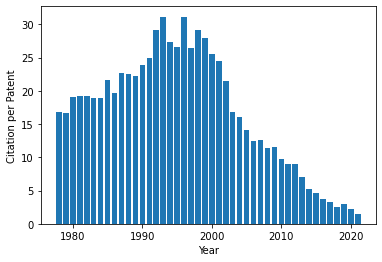

In [169]:
# Let us observe citations per patent over time, by application year.
# The resulting graph strikingly illustrates the truncation problem.
citation_per_patent = []
years = []
model_input["application_year"] = model_input["application_year"].astype(int)
for i in range(1978,2023):
    years.append(i)
    citation_per_patent.append((model_input[model_input["application_year"]==i]["count"].sum())/(len(set(model_input[model_input["application_year"]==i]["patent_id"]))))
    
plt.bar(years, citation_per_patent)
plt.xlabel("Year")
plt.ylabel("Citation per Patent")
plt.savefig("citation_per_patent.png")

In [165]:
for i in model_input.columns:
    print(i)

Unnamed: 0.1
Unnamed: 0
patent_id
count
patent_type
grant_year
num_claims
application_year
assignee_id
assignee_type
ipc_class
class_size
backward_citations
novelty
circulation
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
37
40
41
42
43
44
45
46
47
49
56
60
61
62
63
64
65
66
67
68
70
71
75
81
93
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
pendency


In [175]:
model_input = model_input.drop(columns=["Unnamed: 0","Unnamed: 0.1","patent_type", "assignee_id", "ipc_class"], axis=1)

In [176]:
model_input

,patent_id,count,grant_year,num_claims,application_year,assignee_type,class_size,backward_citations,novelty,circulation,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,pendency
0,10000017,1,2018.0,21,2015.0,3.0,11.079678,0.0,1,4.0,...,0,0,0,0,1,0,0,0,0,3.0
1,10000033,3,2018.0,20,2015.0,2.0,11.079678,0.0,2,4.0,...,0,0,0,0,1,0,0,0,0,3.0
2,10025115,1,2018.0,14,2016.0,3.0,11.079678,0.0,1,4.0,...,0,0,0,0,1,0,0,0,0,2.0
3,10029937,2,2018.0,14,2015.0,3.0,11.079678,0.0,1,4.0,...,0,0,0,0,1,0,0,0,0,3.0
4,10058890,1,2018.0,14,2016.0,2.0,11.079678,3.0,1,4.0,...,0,0,0,0,1,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76154,D451959,5,2001.0,1,2001.0,2.0,7.890583,0.0,4,21.0,...,0,0,0,0,0,0,0,0,0,0.0
76155,D464189,8,2002.0,1,2001.0,2.0,9.356603,0.0,0,20.0,...,0,0,0,0,0,0,0,0,0,1.0
76156,D473755,10,2003.0,1,2002.0,3.0,9.356603,0.0,1,19.0,...,0,0,0,0,0,0,0,0,0,1.0
76157,D493086,20,2004.0,1,2003.0,2.0,9.356603,0.0,2,18.0,...,0,0,0,0,0,0,0,0,0,1.0


In [177]:
model_input.to_csv("model_input_clean.csv")